Covariance:
 [[ 42.25038423 -36.11651207 -22.91266571 -27.50771018  15.26015924
  -19.91892787]
 [-36.11651207  43.16605786  29.09514072  27.54121814 -12.6705483
   -2.21914   ]
 [-22.91266571  29.09514072  21.38015719  18.28029481  -7.994401
   -5.61059475]
 [-27.50771018  27.54121814  18.28029481  20.55550258  -9.98402297
    6.94201597]
 [ 15.26015924 -12.6705483   -7.994401    -9.98402297   6.39852041
   -8.34780478]
 [-19.91892787  -2.21914     -5.61059475   6.94201597  -8.34780478
   46.69922546]]

Eigenvalues:
 [122.97893499  53.7505949    1.07932072   0.97168609   0.93545222
   0.7338588 ]

Eigenvectors (principal components):
 [[-0.56962075  0.1794177   0.49822652 -0.41295253  0.30682    -0.36116966]
 [ 0.55780477  0.28333623 -0.25321502 -0.69985803  0.08096259 -0.21931797]
 [ 0.36729226  0.27419805  0.24958584  0.35802355  0.761667    0.13892893]
 [ 0.39979297  0.02315616  0.78228733 -0.04714259 -0.45808441  0.12486857]
 [-0.20638978  0.08889555 -0.00792884 -0.39279793  0.092

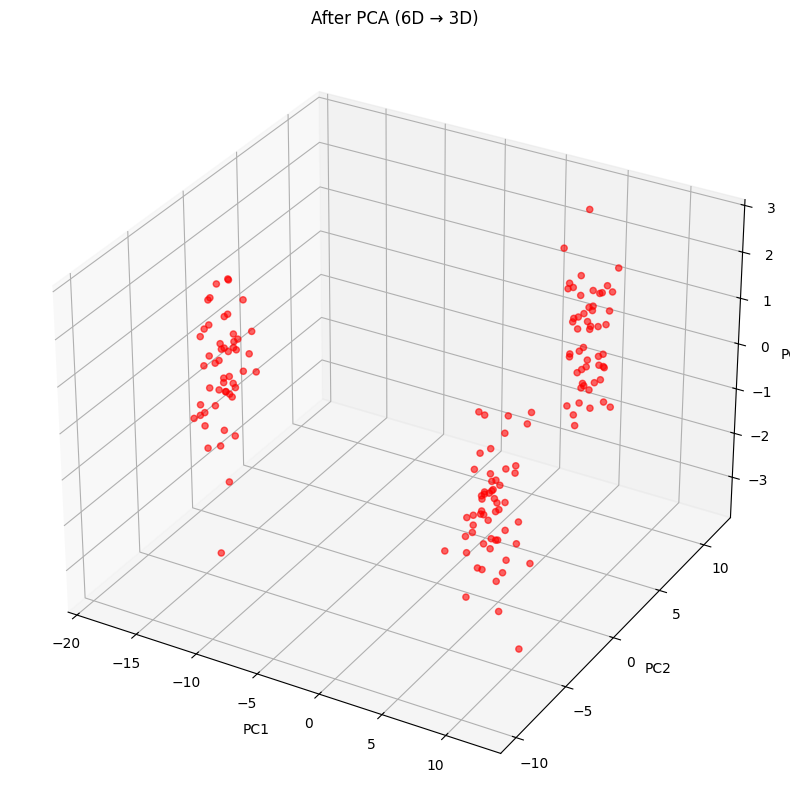

In [8]:
## Implementing Principal Component Analysis
## It is an unsupervised macine learning model
## PCA is a model for dimensionality reduction i.e. finding new features (lesser number than the original number of features) that can explain the correlation between data points or the lack thereof

## Steps
# 1. mean centre the data: This is done to ensure that we remove bias from the data, so when we are calculating the covariance matrix it gives us the true correlation of the data
# 2. calculate the matrix of covariance of the data
# 3. Calculate the eigen vectors and the eigen values of the covariance matrix
# These eigen vectors represent the vectirs by which the correlation in the data can be described
# Eigen values denoted the level of information that is captured by the corresponding eigen vector
# 4. Arrange the eigen vectors in acsending order of eigen values, PC1 is the first eigen vector, PC2 is the eigen vector orthogonal to the first eigen vector

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Generate dummy dataset

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Generate data set with 3 clusters
X, y = make_blobs(
    n_samples=200,
    centers=3,       # Number of clusters
    n_features=6,    # Dimensions
    random_state=42
)
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Mean cente the data
X_meaned = X_train - np.mean(X_train, axis = 0)

# Compute the covariance matrix
cov_matrix = np.cov(X_meaned, rowvar = False)
print("Covariance:\n", cov_matrix)

# Eigen decomposition of covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# Sort the eigen vectors and values
sorted = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted]
eigenvectors = eigenvectors[:, sorted]

print("\nEigenvalues:\n", eigenvalues)
print("\nEigenvectors (principal components):\n", eigenvectors)

# 6. transform data using the eigen vecotrs 6D -> 3D
X_pca = np.dot(X_meaned, eigenvectors)

# PCA-transformed data, should find 3 clusters
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')  # 3D axis

ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2],
           c='red', alpha=0.6)

ax.set_title("After PCA (6D → 3D)")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

plt.show()
